# CS6493 - tutorial 9

## Dialogue System

***Before the tutorial - No coding in this tutorial.***

In general, there are two of the most popular topics in the field of dialogue system, i.e., `task-oriented dialogue system` and `open-domain dialogue system`.


- Task-oriented systems solve specifc problems in a certain domain such as movie
ticket booking, restaurant table reserving, etc. 
A task-oriented dialogue system requires stricter response constraints because it aims to accurately handle the user message. Therefore, modular methods were proposed to generate responses in a more controllable way. 
The architecture of a modular-based system consists of four modules:

  1. Natural Language Understanding(NLU): converts the raw user message
into semantic slots, together with classifcations of domain and user intention
  2. Dialogue state tracking (DST):  iteratively calibrates the dialogue states
based on the current input and dialogue history. The dialogue state includes related user actions and slot-value pairs.
  3. Policy Learning: Based on the calibrated dialogue states from the DST module, this module decides the next action of a dialogue agent.
  4. Natural Language Generation(NLG):  converts the selected dialogue
actions into surface-level natural language

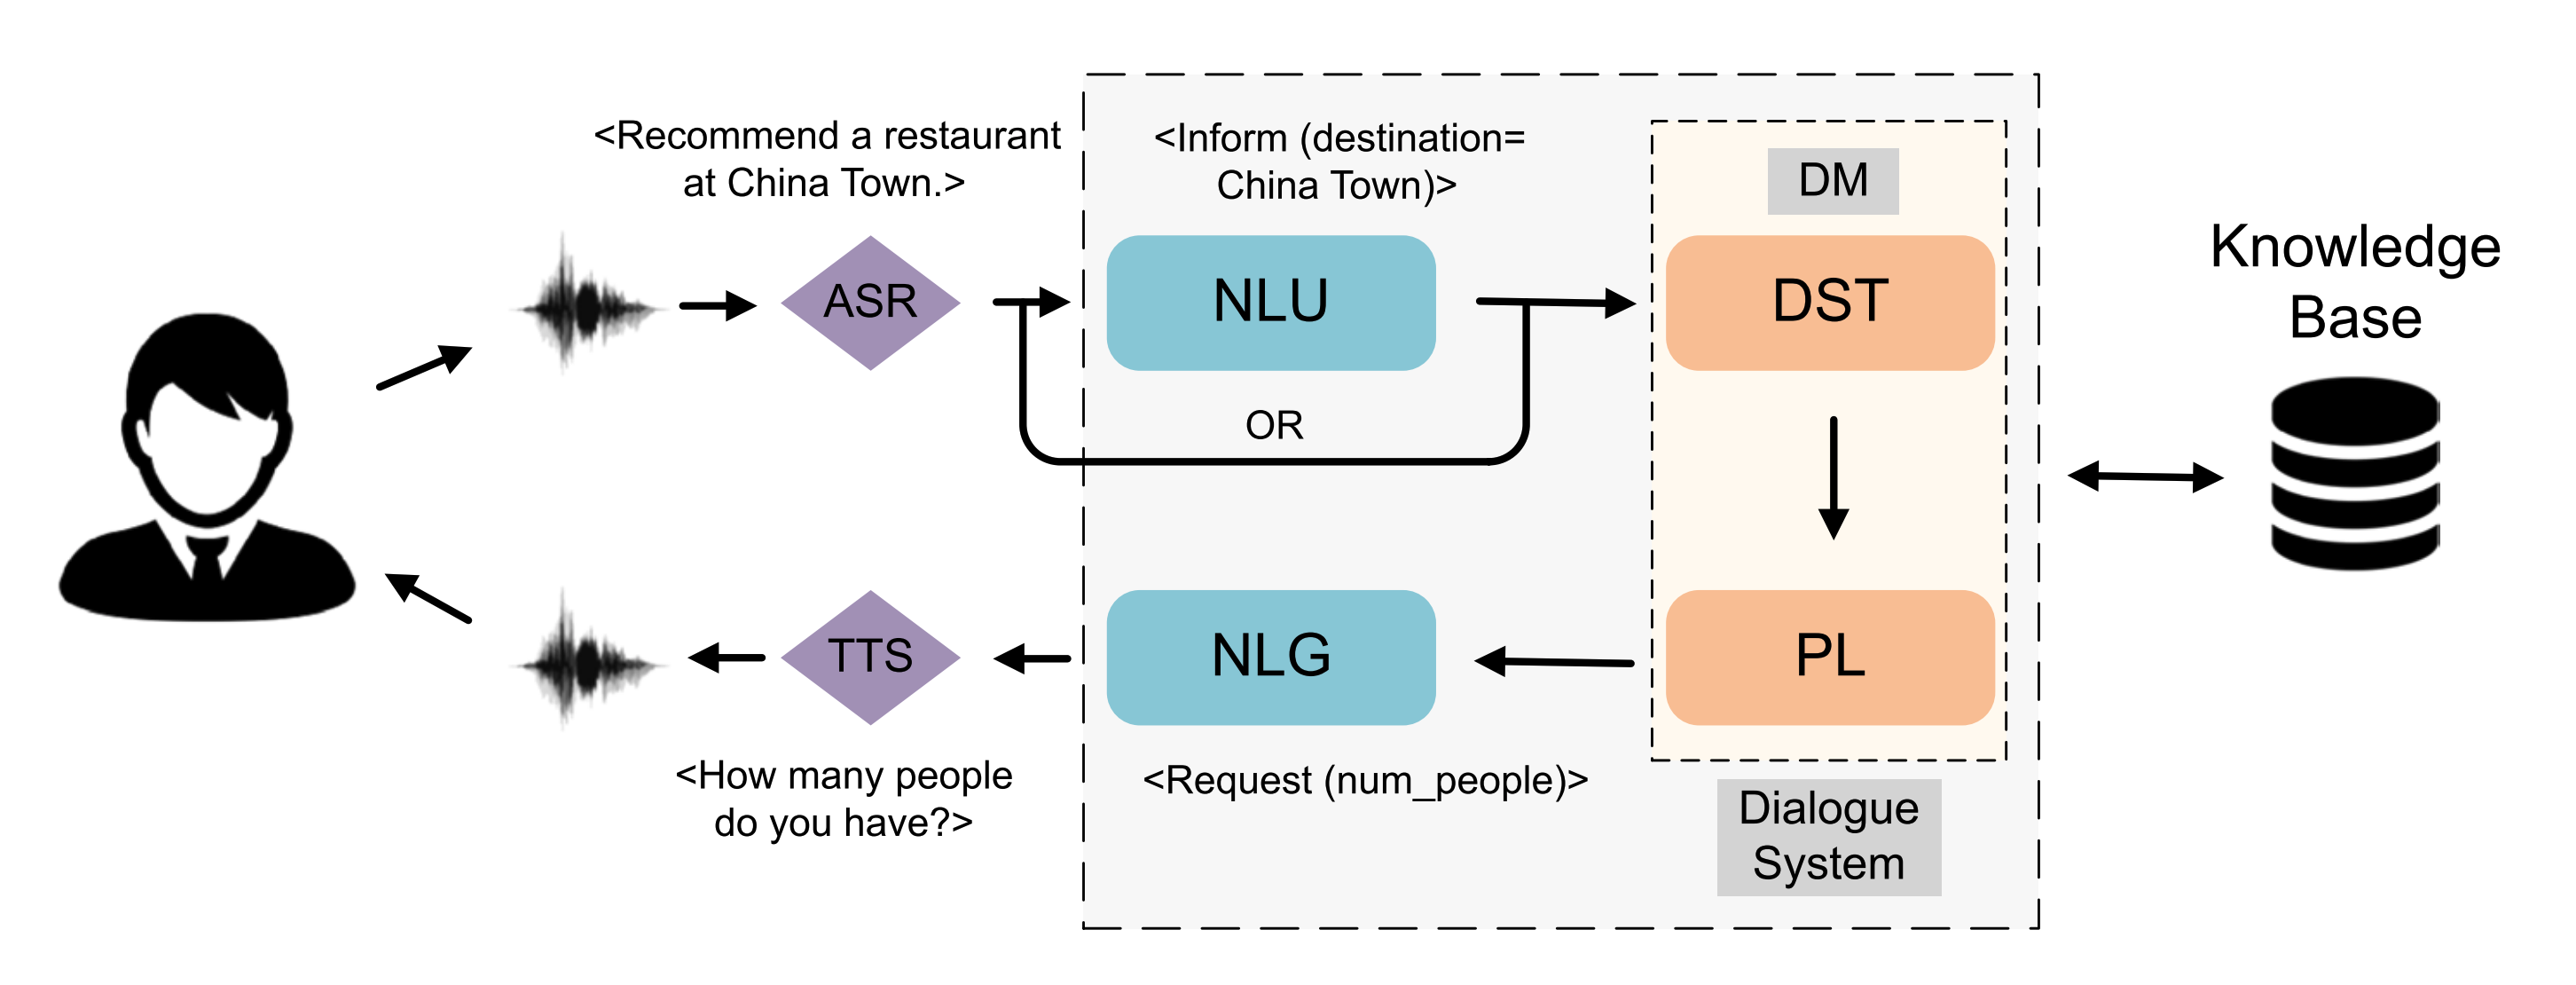

- open-domain dialogue systems are also called chit-chat dialogue systems or non-task-oriented dialogue systems. open-domain dialogue systems aim to perform
chit-chat with users without the task and domain restriction and are usually fully data-driven. These systems could be divided into three categories:
  1. generative systems: apply sequence-to-sequence models to map the user message and dialogue history into a response sequence that may not appear in the training corpus.
  2. retrieval systems: find a pre-existing response from a certain response set. 
  3. ensemble systems: combine generative methods and retrieval-based methods 

***In this tutorial***

we will introduce some advanced and interesting topics in dialogue system.

## 1. [BlenderBot 1.0](https://arxiv.org/pdf/2004.13637.pdf)
Beyond the normal pretraining tasks and simply scaling language models, the recipes for building opendomain chatbots that perform well in human evaluations:

  1. Blending Skills:  select tasks and datasets that make the model focus on personality and engagingness, knowledge, and empathy, achieving large gains by using the [Blended Skill Talk(BST)](https://parl.ai/projects/bst/)
  2. Decoding strategy: The choice of decoding algorithm is of critical
importance, and two models with the same perplexity but different decoding algorithms can give vastly different results. BB1.0 conduct a comparison between beam searching, top-k sampling, and sample-and-rank. BB1.0 also trained a 4-class classifier to predict the length of the response(e.g., < 10, < 20, < 30, or > 30 tokens), and add the predicted length constraints to the decoding strategy.


### Model Architecture:
  1. Retriever: Poly-Encoder
  2. Generator: standard Seq2Seq Transformer

  BB1.0 has three different version: 90M, 2.7B and 9.4B parameter models



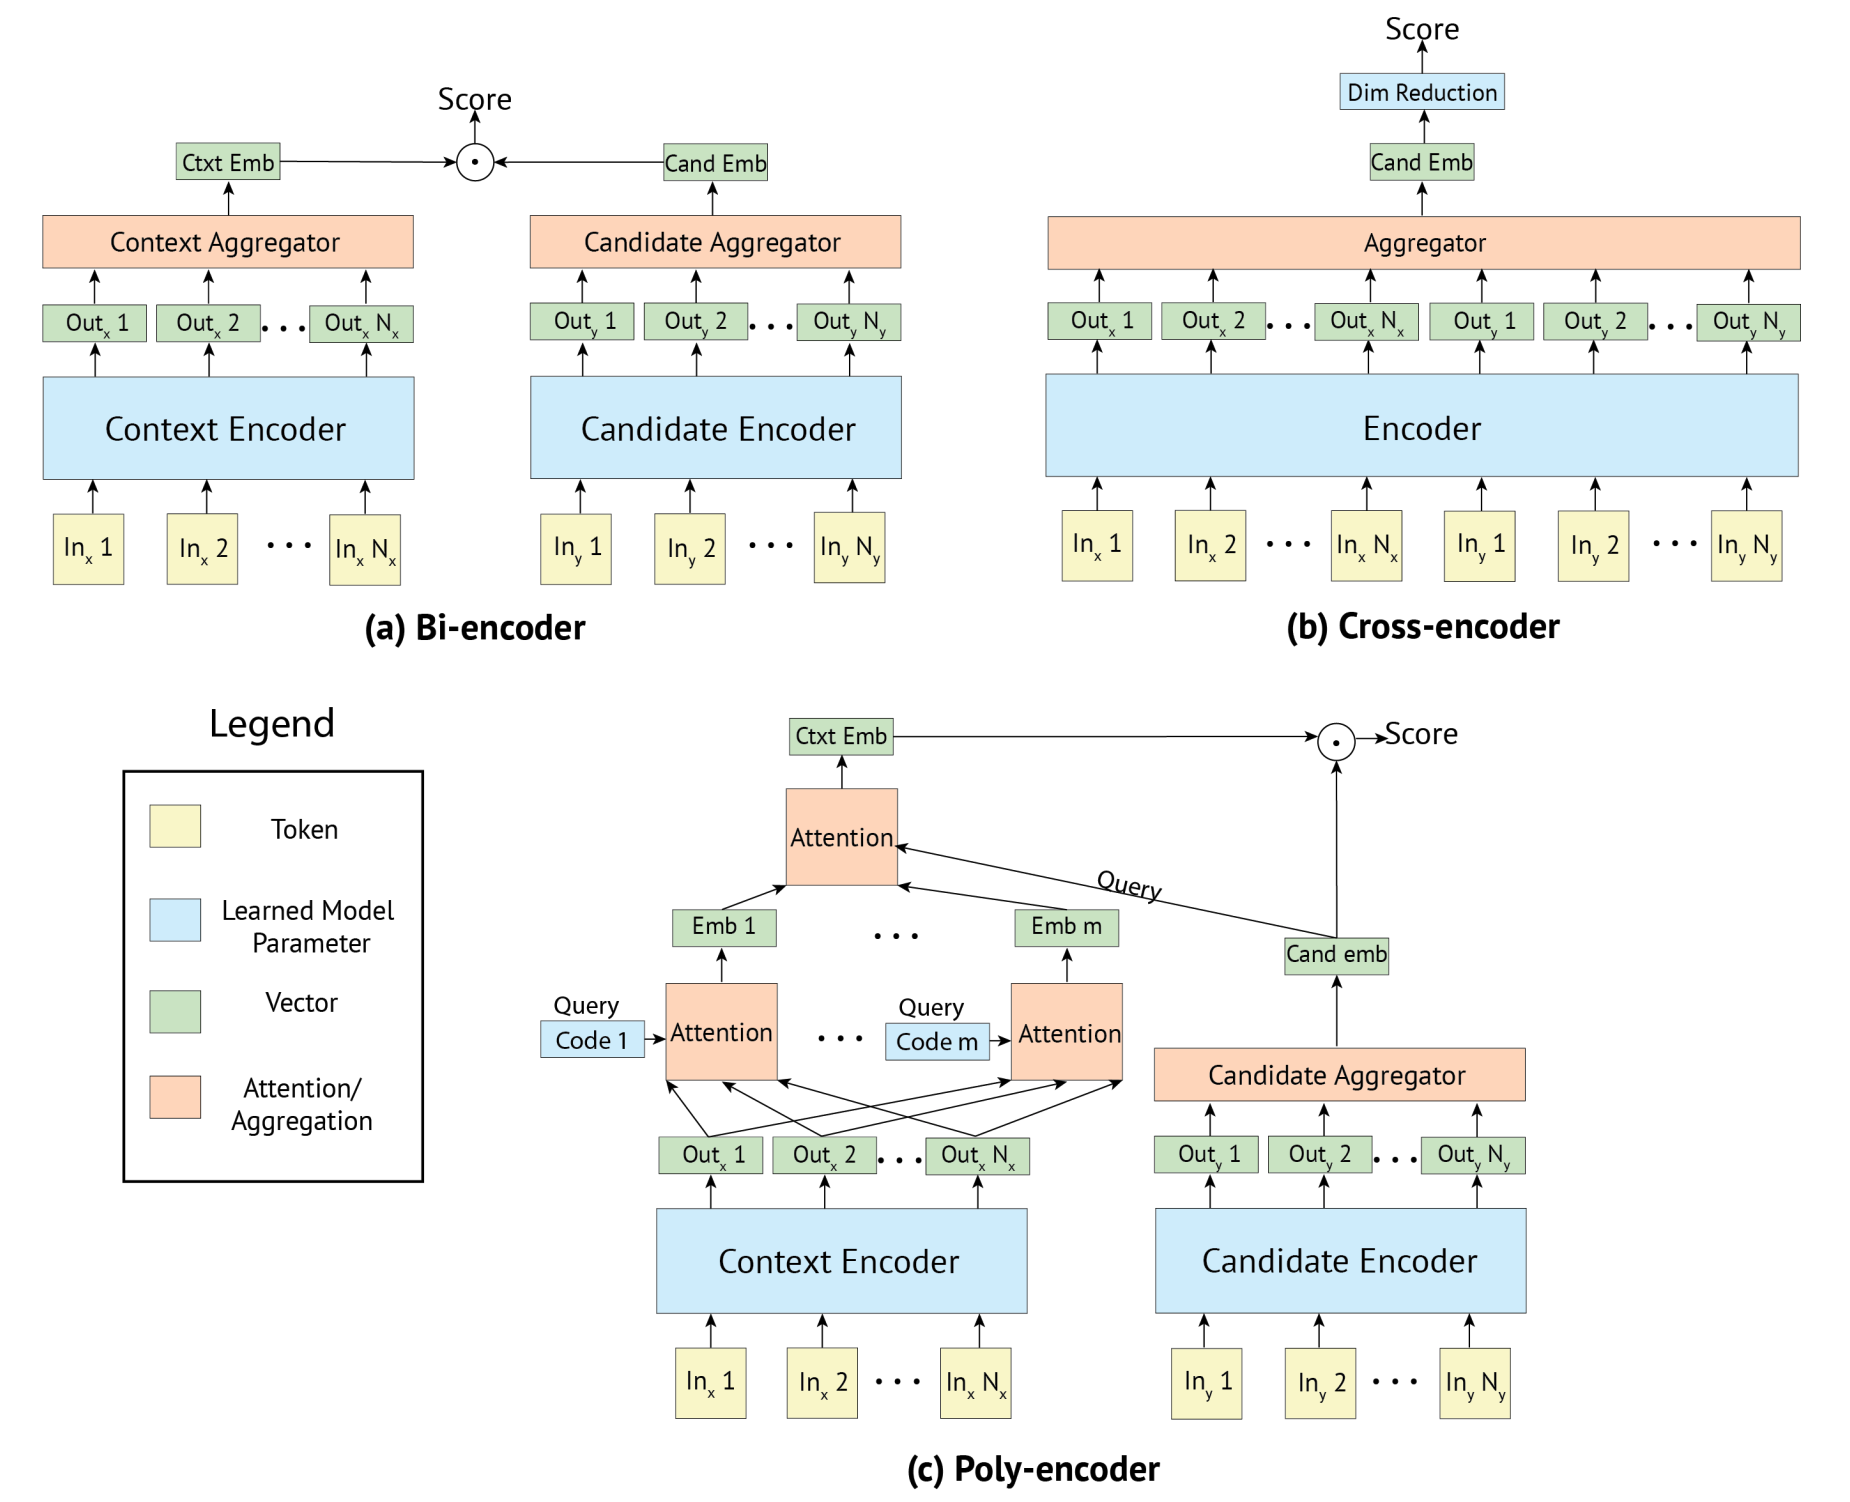

### Retrieve and Refine:
  - Dialogue Retreival: Given the dialogue history, the retrieval model is first used to produce a response. Rather than showing this response to the speaking partner it is appended to the input sequence of the generator, along with a special separator token. The generator then outputs a response as normal given this modified input sequence.
  - Knowledge Retrieval: train a Transformer-based classifier to choose when to perform retrieval or not on a per-turn basis, as some contexts do not require knowledge. If knowledge retrieval is needed, then first retrieve from a large knowledge base, instead of retrieving an initial dialogue utterance.

## 2. [BlenderBot 2.0](https://parl.ai/projects/blenderbot2/)

A chatbot with its own long-term memory and the ability to access the internet. It outperforms existing models in terms of longer conversations over multiple sessions and is more knowledgeable and has more factual consistency, according to human evaluators.

Language-generation models such as 
GPT-3 and BB1.0 can articulately express themselves, at least in the context of ongoing conversations, and generate realistic-looking text. But they suffer from very short “goldfish memory,” and any long-term memory they do have is static — it’s limited to what they’ve been previously taught. They can never gain additional knowledge, it knows about past popular TV shows and movies, but isn’t aware of new series, like WandaVision.

BlenderBot2 roughly separates its operations into three modules — Knowledgebase (search module), long-term memory, and text generator.

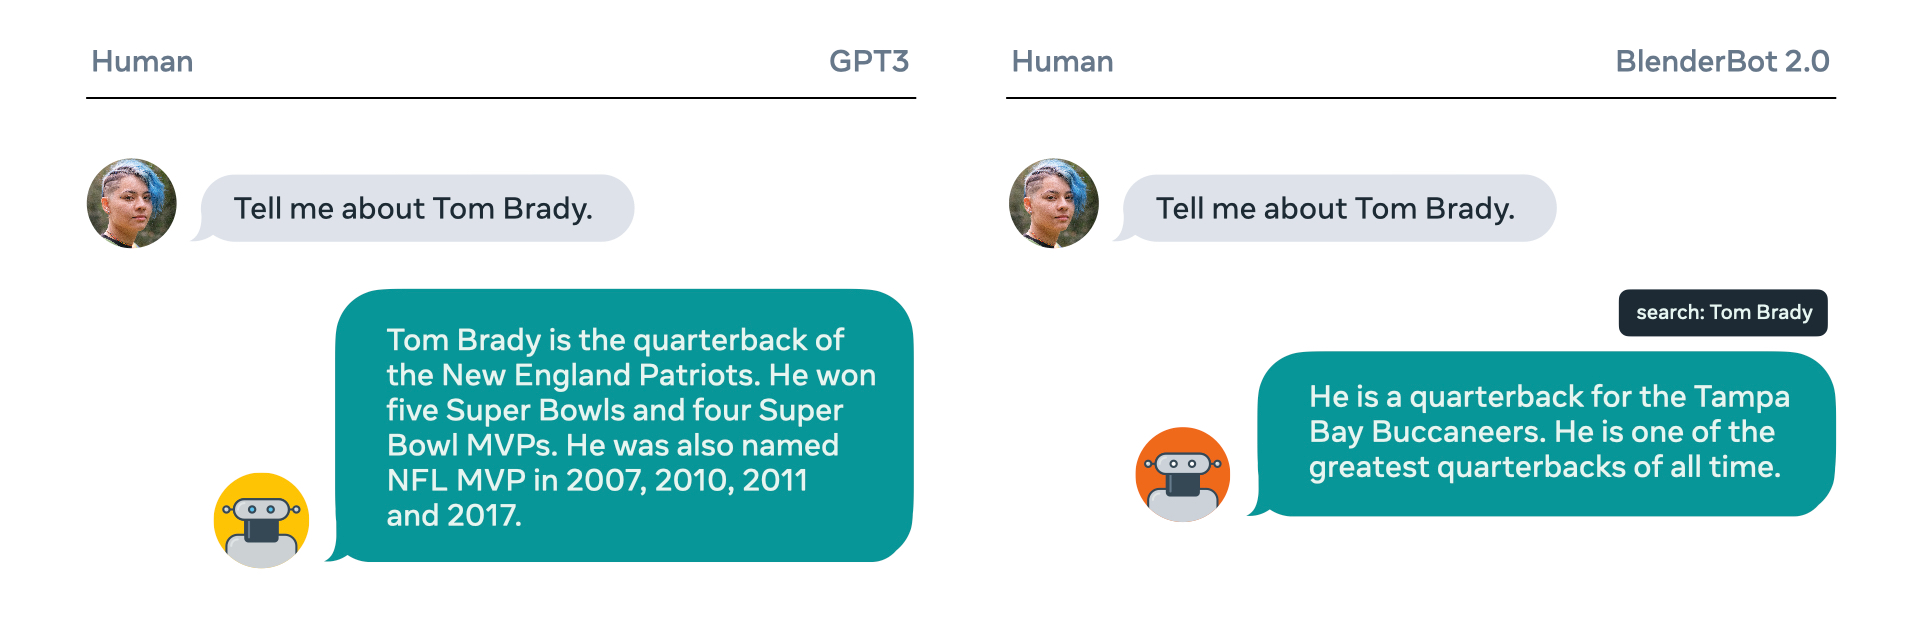

### Retrieve from the internet:
BB2.0 query the internet with two different strategy: 
1. a dump of the internet accessed via 
nearest neighbor lookup
2. Bing Search API. 

BB2.0 generates an appropriate conversational response based on what it has discovered on the internet.

### Long-term Memory
Long-term memory is fast in-memory vector storage that supports searching through conversation history for previously collected knowledge (from either the knowledgeBase or the user).

This can be done by summarizing the entire conversation into a small paragraph for a specific conversation session. Keep this updated across turns. 

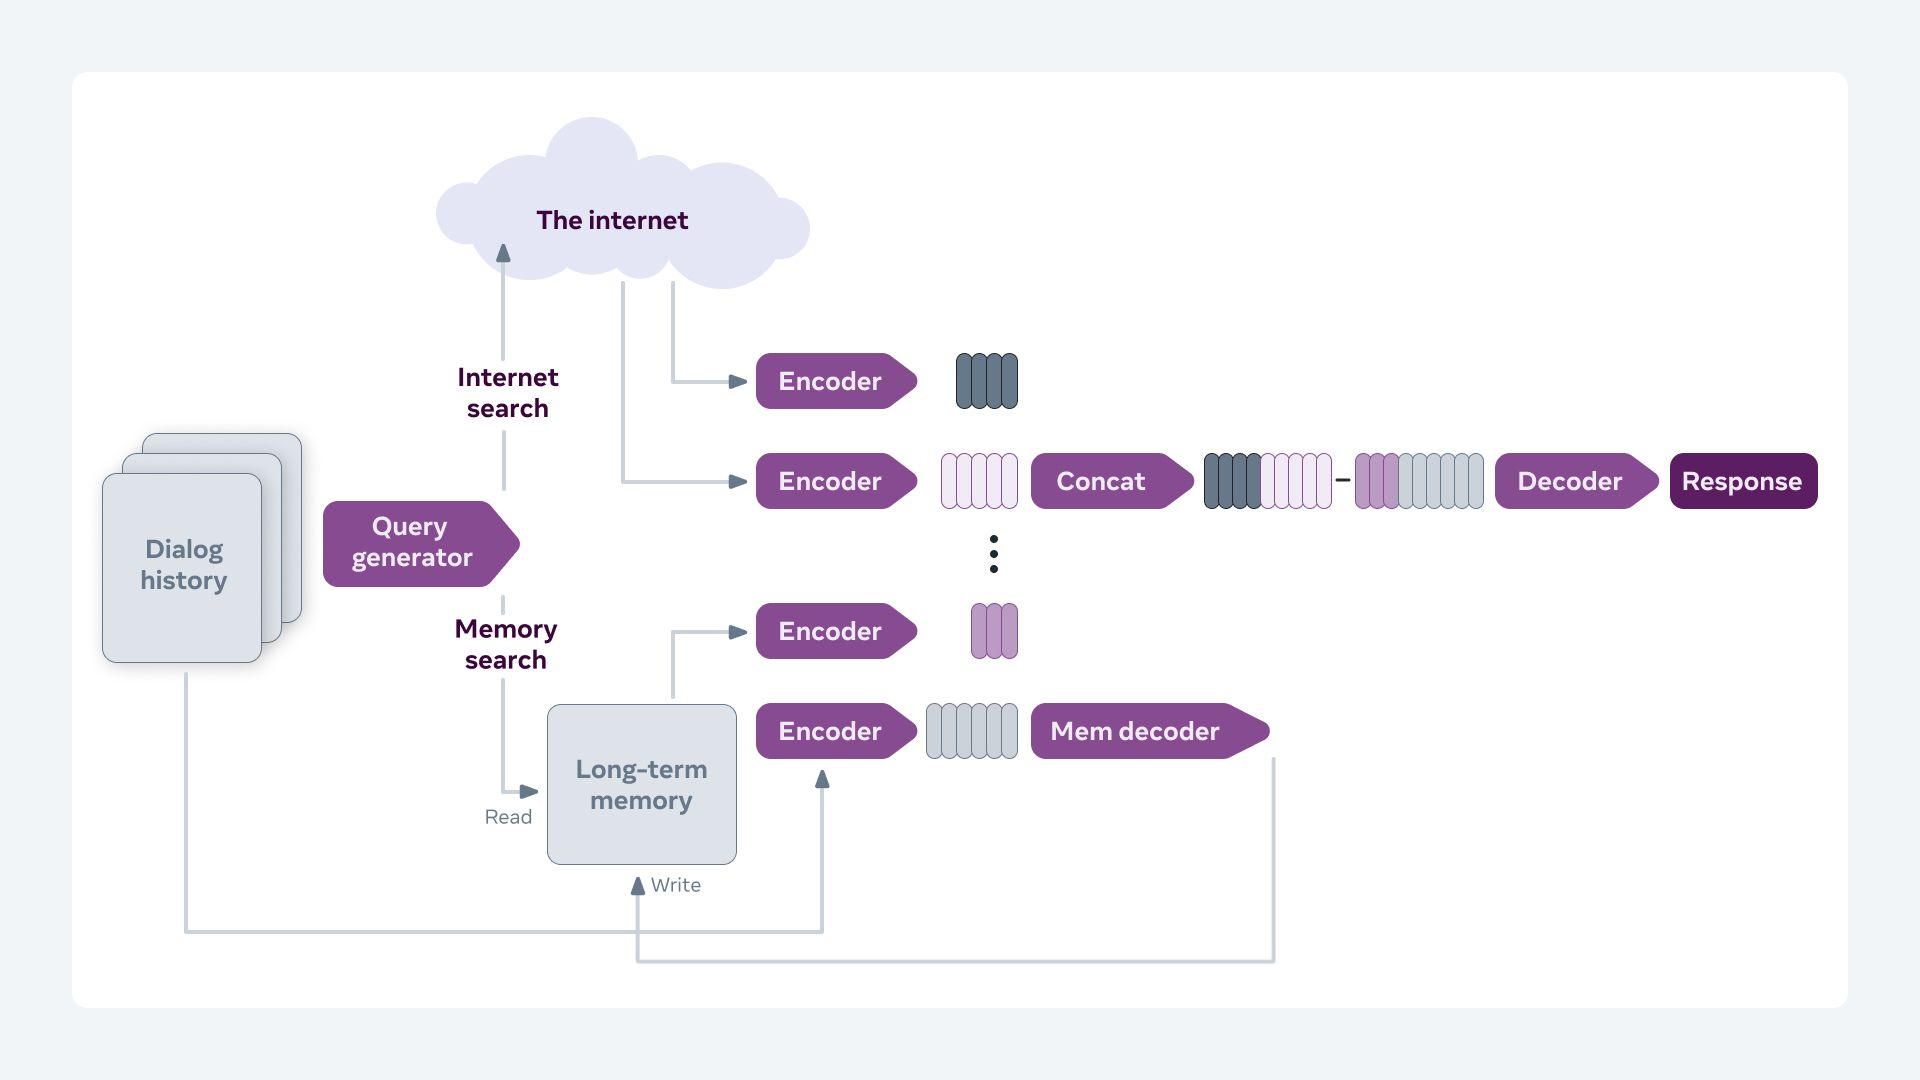

### Training Data:
Facebook posted tasks on a crowdsourcing platform.

1. Participants were asked to play a specific personality in a conversation and discuss the same topic every few hours and every few days, collecting it into a multi-round conversation dataset.
2. Participants need to describe their interests to start the conversation, and others can search online and pick up the conversation.

This way the BB can learn not only what keywords are appropriate for humans to search for when faced with different topics, but also what kind of information can be used in the chat.

## 3. [BlenderBot 3.0](blenderbot.ai)

In BB3, there are more complex setups with more modules, while keeping all the features of the BB1 and BB3. 
BB3 is released in three sizes: 3B, 30B and 175B parameters. 
The 30B and 175B parameter versions are based on the publicly released [Open Pretrained Transformer](https://arxiv.org/abs/2205.01068) (OPT) (Zhang et al., 2022), 
which is fine-tuned to perform well in dialogue task. 
The 3B parameter model is based on the R2C2 model used in [SeeKeR](https://arxiv.org/pdf/2203.13224.pdf) (Shuster et al., 2022).



### Modules
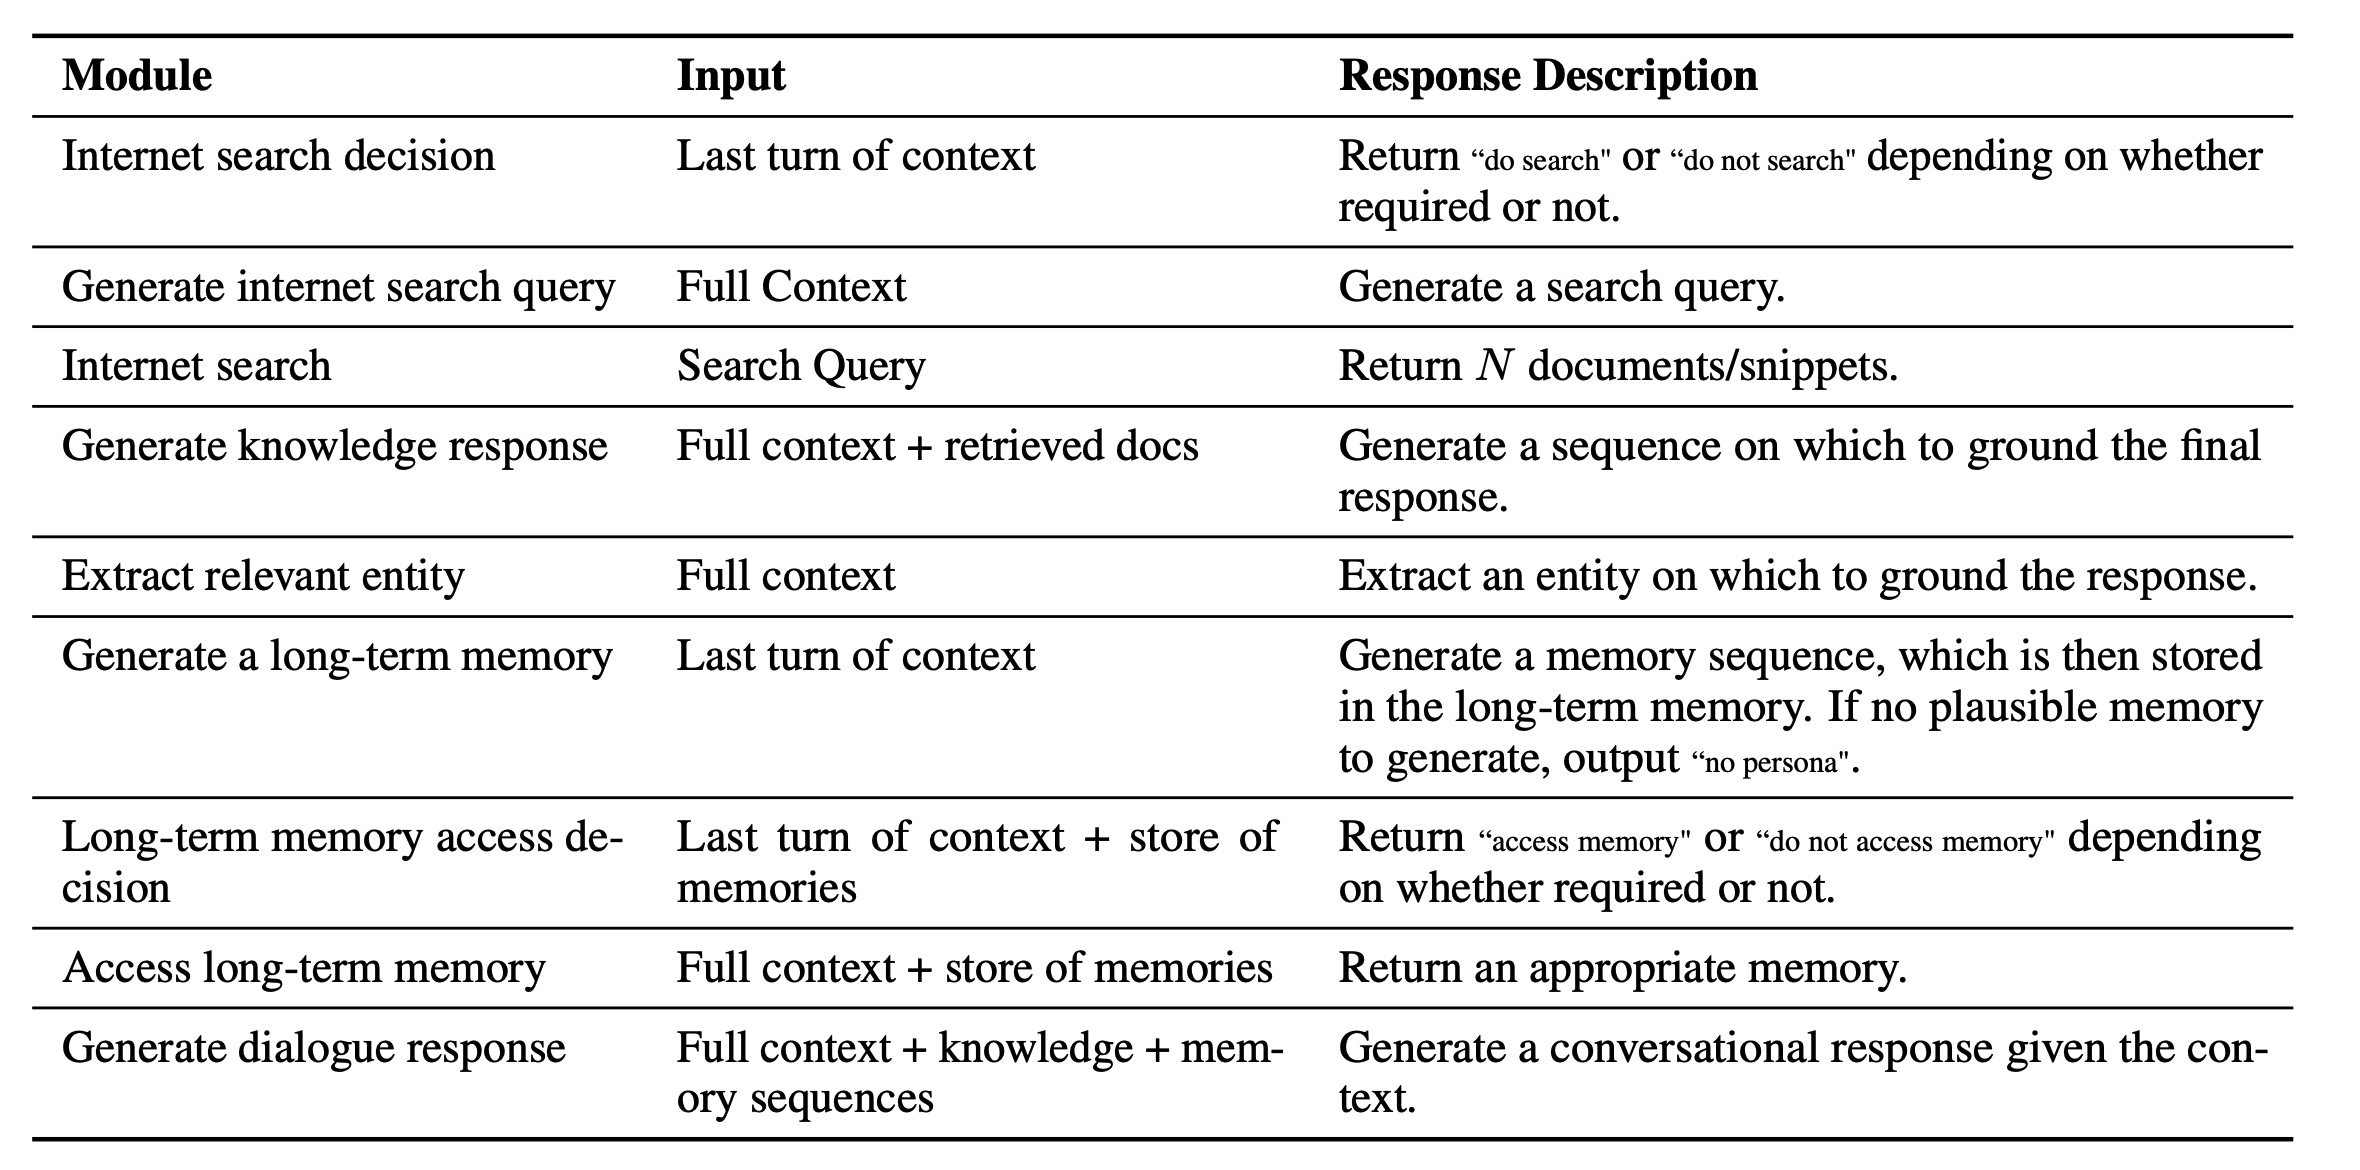

**Internet search decision**: Given the last turn
of context, this module outputs whether internet
search should be conducted or not.

**Generate internet search query**: Given the full
input context, generate a search query to be issued
to an internet search engine.

**Internet search**: This module is not executed by
the transformer but a call to the actual internet search engine. It returns N documents/snippets.

**Generate knowledge response**: Given the full input context and a set of retrieved documents, generate a sequence referred to as the knowledge response (Adolphs et al., 2021), which is used to
ground the final response.

**Extract relevant entity** Given the full input context, generate a relevant entity which is used to ground the final response.

**Generate a long-term memory** Given the last
turn of context, output a summary of that last turn
that will be stored in the long-term memory. For example if the last turn was “Yes, it’s all true, my cat is black!” the output summary generated might be
“I have a black cat.”. If the model thinks no summary should be generated for that turn it outputs “no persona”.

**Long-term memory access decision** Given the
last turn of context, and a store of (text-based) memories, output whether long-term memory access should be conducted or not.

**Access long-term memory** Given the full input
context, and a store of (text-based) memories, output a memory from the memory store, referred to as a recalled memory. 

**Generate dialogue response** Given the full input context and optionally a knowledge response
and recalled memory, generate a final conversational response. 

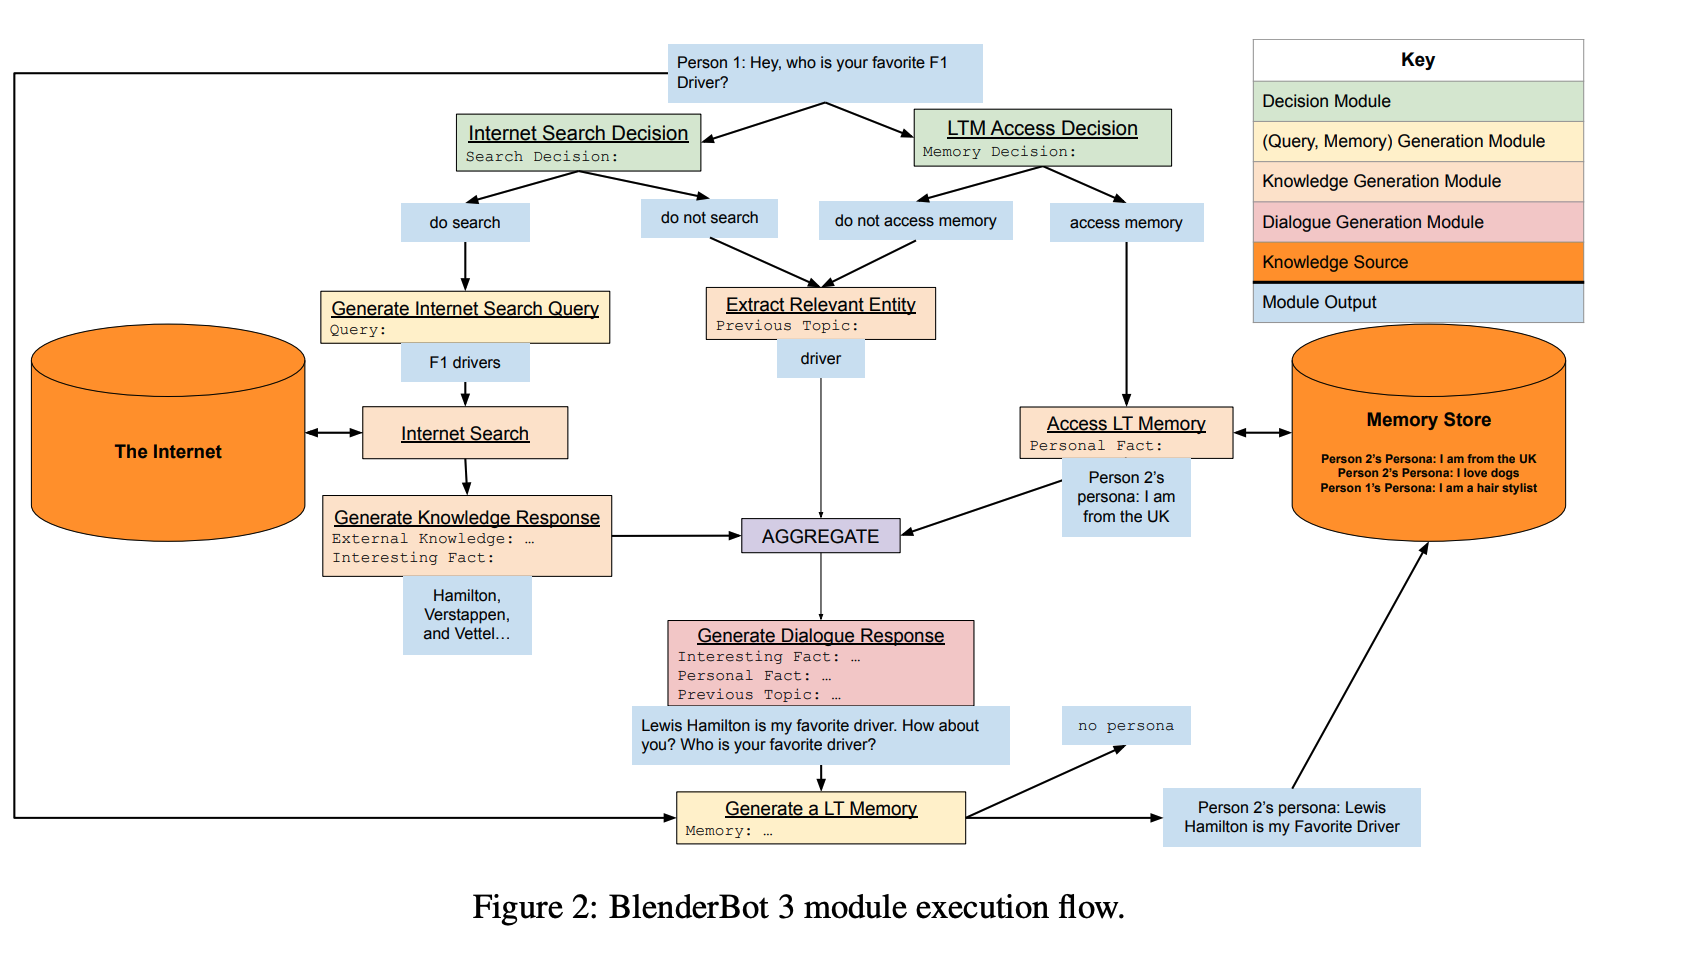

### Procedure
Given a new utterance, The model will determine whether search and long-term memory access are required. 
```
if search is required: 
      generate search query
      search on internet
      get knowledge response
      append response to input
if long-term memory access is needed:
      access the memory
      get response
      append response to input
it not seach and not access to long-term memory:
      extract the entity
      append to input

send input to generator
```

##Finetune
Finetune tasks:
- Internet search decision
- Generate internet search query
- Generate knowledge response
- Extract relevant entity
- Generate a long-term memory
- Long-term memory access decision 
- Access long-term memory
- Generate dialogue response

